In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import requests
import pandas as pd
import requests
import json
import csv
import time
import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('cheap_train_sample.csv')

In [35]:
pd.set_option('max_columns', None)

In [49]:
df.shape

(6513, 14)

In [36]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [31]:
df['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [25]:
df['marital-status'].value_counts()

 Married-civ-spouse       2978
 Never-married            2135
 Divorced                  898
 Separated                 210
 Widowed                   204
 Married-spouse-absent      81
 Married-AF-spouse           7
Name: marital-status, dtype: int64

In [26]:
df['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
 ?                              120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 South                           18
 Jamaica                         18
 Puerto-Rico                     17
 India                           17
 China                           17
 England                         16
 Cuba                            16
 Italy                           15
 Poland                          14
 Japan                           12
 Guatemala                       11
 Columbia                        11
 Haiti                           11
 Taiwan                          10
 Iran                            10
 Peru                             9
 France                           9
 Vietnam                          8
 Cambodia                         6
 Nicaragua                  

In [37]:
df[df['native-country']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
83,34,Private,198613,11th,7,Married-civ-spouse,Sales,Husband,Male,0,0,25,?,<=50K
155,57,Private,140426,1st-4th,2,Married-spouse-absent,Other-service,Not-in-family,Male,0,0,35,?,<=50K
269,36,Private,358682,Bachelors,13,Never-married,Exec-managerial,Other-relative,Male,0,0,50,?,<=50K
325,42,Self-emp-not-inc,183765,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,Male,0,0,40,?,<=50K
498,20,Private,219266,HS-grad,9,Married-civ-spouse,Prof-specialty,Own-child,Female,0,0,36,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,38,Private,22245,Masters,14,Married-civ-spouse,Transport-moving,Husband,Male,0,0,72,?,>50K
6368,68,?,286869,7th-8th,4,Widowed,?,Not-in-family,Female,0,1668,40,?,<=50K
6381,36,Private,247558,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Male,5178,0,60,?,>50K
6438,55,Self-emp-inc,183869,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,50,?,>50K


In [2]:
df = pd.read_csv("cleaned_train_sample.csv")

In [3]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,3,5,0,0,1,1,0,0,40,37,0
1,28,3,9,2,2,0,1,0,0,45,37,0
2,33,3,13,2,11,0,1,7688,0,50,37,1
3,26,3,13,2,7,0,1,0,0,45,37,1
4,40,0,14,4,3,1,0,14084,0,55,37,1


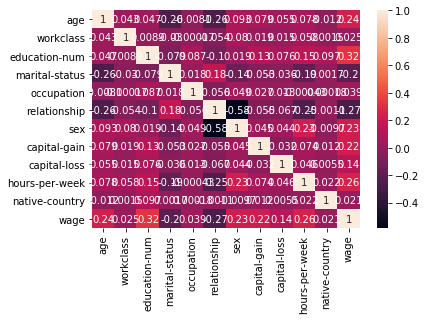

In [7]:

sns.heatmap(df.corr(), annot=True)

In [4]:
X = df.drop(columns='wage')
y = df['wage']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state=24)

In [6]:
ss = StandardScaler()

In [7]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Logistic Regression WITHOUT boost

In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
lr_1_params = {
    
     'penalty': ['l1'],
     'C': [1, 1.5, 2, 2.5],
     'class_weight': ['balanced'],
     'warm_start': [True, False],
     'random_state': [24],
     'solver': ['liblinear']}
        
D = GridSearchCV(LogisticRegression(),
                 
                 lr_1_params,
                 cv = 5,
                 verbose = 1,
                 n_jobs = -1)
        
   
        
lr_2_params = {
    'penalty': ['l2'],
    'C': [1, 1.5, 2, 2.5],
    'class_weight': ['balanced'],
    'warm_start': [True, False],            
    'random_state': [24],
    'solver': ['lbfgs', 'liblinear']}
        
C = GridSearchCV(LogisticRegression(),
                    lr_2_params,
                    cv = 5,
                    verbose = 1,
                    n_jobs = -1)

In [57]:
lr.score(X_train, y_train)

0.8268714011516315

In [58]:
lr.score(X_test, y_test)

0.8311588641596316

In [59]:
D.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5], 'class_weight': ['balanced'],
                         'penalty': ['l1'], 'random_state': [24],
                         'solver': ['liblinear'], 'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [60]:
D.score(X_train, y_train)

0.7694817658349328

In [61]:
D.score(X_test, y_test)

0.7766692248656946

In [62]:
C.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5], 'class_weight': ['balanced'],
                         'penalty': ['l2'], 'random_state': [24],
                         'solver': ['lbfgs', 'liblinear'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [63]:
C.score(X_train, y_train)

0.7687140115163148

In [64]:
C.score(X_test, y_test)

0.7759017651573292

## Logistic Regression WITH boost

In [330]:
ada = AdaBoostClassifier(base_estimator=LogisticRegression())

ada_param = {
    'n_estimators' : [None, 25, 50, 75, 100]
}

gs = GridSearchCV(ada, param_grid=ada_param, cv = 5, n_jobs= -1)

In [331]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                                                                            multi_class='auto',
                                                                            n_jobs=None,
                                                                            

In [332]:
gs.best_score_

0.8213051823416506

In [333]:
gbs = gs.best_estimator_

In [334]:
gbs.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=100, random_state=None)

In [335]:
gbs.score(X_train, y_train)

0.8207293666026871

In [336]:
gbs.score(X_test, y_test)

0.8234842670759785

## ada boost Decision Tree

In [73]:
dt = DecisionTreeClassifier()

In [60]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

ada_param = {
    'n_estimators' : [None, 10, 25, 50, 100, 200]
}

gs = GridSearchCV(ada, param_grid=ada_param, cv = 5, n_jobs=-1)

In [61]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [62]:
gs.best_score_

0.8220729366602686

In [63]:
gsBest = gs.best_estimator_

In [64]:
gsBest.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [65]:
gsBest.score(X_train, y_train)

0.989827255278311

In [66]:
gsBest.score(X_test, y_test)

0.8234842670759785

## DT without boost

In [239]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid =
                   {
                       'max_depth' : [None, 3, 5, 7, 10],
                       'min_samples_split' : [1, 2,5, 10, 15, 20],
                       'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7],
                       'splitter' : ['best', 'random']
                   },
                   cv = 5, n_jobs=-1)

In [240]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 10],
                     

In [241]:
grid.best_score_

0.8433781190019195

In [242]:
gt = grid.best_estimator_

In [243]:
gt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [244]:
gt.score(X_train, y_train)

0.854510556621881

In [245]:
gt.score(X_test, y_test)

0.8411358403683806

In [300]:
dt = DecisionTreeClassifier()

In [301]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [302]:
dt.score(X_train, y_train)

0.989827255278311

In [303]:
dt.score(X_test, y_test)

0.8089025326170376

## ada boost NB

In [22]:
bNB = BernoulliNB()

In [42]:
ada = AdaBoostClassifier(base_estimator=BernoulliNB())

ada_param = {
    'n_estimators' : [10, 25, 50, 75, 100]
}

gsvB = GridSearchCV(ada, param_grid=ada_param, cv = 5)

In [44]:
gsvB.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=BernoulliNB(alpha=1.0,
                                                                     binarize=0.0,
                                                                     class_prior=None,
                                                                     fit_prior=True),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [10, 25, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
gsvBest = gsvB.best_estimator_

In [47]:
gsvBest.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                              class_prior=None,
                                              fit_prior=True),
                   learning_rate=1.0, n_estimators=25, random_state=None)

In [48]:
gsvBest.score(X_train, y_train)

0.8138195777351248

In [49]:
gsvBest.score(X_test, y_test)

0.8257866462010744

## NB without boost

## Random Forest

In [47]:
rf = RandomForestClassifier()

## Random Forest WITH boost

In [203]:
ada = AdaBoostClassifier(base_estimator=BernoulliNB())

ada_param = {
    'n_estimators' : [None, 25, 50, 75, 100],
    'alpha' : [0, 0.1, 0.3, 0.8, 1]
}




gsRF = GridSearchCV(ada, param_grid=ada_param, cv = 5, n_jobs=-1)



In [205]:
gsRF.fit(X_train, y_train)

In [206]:
nb = BernoulliNB()

In [228]:
nb_params = {
    'alpha' : [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
    
}

nb1 = GridSearchCV(BernoulliNB(),
                nb_params,
                cv = 5,
                n_jobs = -1)

In [229]:
nb1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [230]:
nb1.score(X_train, y_train)

0.7967370441458733

In [231]:
nb1.score(X_test, y_test)

0.8019953952417498

## Random Forest WITHOUT boost

In [198]:
rf_params = {
    'n_estimators' : range(5, 100),
    'criterion' : ['gini'],
    'max_depth' : [None, 5, 15, 25],
}

V = GridSearchCV(RandomForestClassifier(),
                rf_params,
                cv = 5,
                n_jobs = -1)

In [199]:
V.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [200]:
V.score(X_train, y_train)

0.9529750479846449

In [201]:
V.score(X_test, y_test)

0.8572524942440521

In [192]:
V.best_score_

0.8445297504798465

In [217]:
vBest = V.best_estimator_

In [218]:
vBest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=76,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
vBest.score(X_train, y_train)

0.9493282149712092

In [220]:
vBest.score(X_test, y_test)

0.8526477359938603

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier()

In [143]:
knn_params = {
    'n_neighbors': range(150, 175, 200),
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

In [144]:
knnGrid = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              cv = 5, 
                              verbose=1)

In [145]:
knnGrid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(150, 175, 200), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [146]:
knnGrid.score(X_train, y_train)

0.827447216890595

In [147]:
knnGrid.score(X_test, y_test)

0.8396009209516501

In [297]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [298]:
knn.score(X_train, y_train)

0.8763915547024952

In [299]:
knn.score(X_test, y_test)

0.8219493476592479

## Bagging

In [246]:
from sklearn.ensemble import BaggingClassifier

In [247]:
bag = BaggingClassifier()

In [248]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [249]:
bag.score(X_train, y_train)

0.9794625719769674

In [250]:
bag.score(X_test, y_test)

0.8326937835763623

In [279]:
bag_params = {
    'n_estimators' : range(1, 50),
    'bootstrap_features' : [True],
    'random_state' : [24],
    'max_samples' : [1.0, 2.0, 3.0],
    'max_features' : [1,2,3,4,5,6,7,8,9,10]
}


bagGrid = GridSearchCV(BaggingClassifier(), 
                              bag_params, 
                              cv = 5, 
                              n_jobs=-1)

In [280]:
bagGrid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap_features': [True],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_samples': [1.0, 2.0, 3.0],
                         'n_estimators': range(1, 50), 'random_state': [24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [281]:
bagGrid.score(X_train, y_train)

0.9512476007677543

In [282]:
bagGrid.score(X_test, y_test)

0.8672294704528012

In [283]:
from sklearn.naive_bayes import GaussianNB

In [284]:
gnb = GaussianNB()

In [285]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [286]:
gnb.score(X_train, y_train)

0.8032629558541267

In [287]:
gnb.score(X_test, y_test)

0.7927858787413661

## Extra Trees

In [304]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [305]:
et = ExtraTreesClassifier()

In [306]:
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [307]:
et.score(X_train, y_train)

0.989827255278311

In [308]:
et.score(X_test, y_test)

0.8342287029930928

In [312]:
et_params = {
  'n_estimators' : [100, 200, 300]
}


etGrid = GridSearchCV(ExtraTreesClassifier(), 
                              et_params, 
                              cv = 5, 
                              n_jobs=-1)

In [313]:
etGrid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [314]:
etGrid.score(X_train, y_train)

0.989827255278311

In [315]:
etGrid.score(X_test, y_test)

0.841903300076746

In [309]:
df2 = pd.read_csv('cleaned_test_data.csv')

In [311]:
df2.head(87)

,age,workclass,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,7,4,6,3,1,0,0,40,37
1,38,3,9,2,4,0,1,0,0,50,37
2,28,1,12,2,10,0,1,0,0,40,37
3,44,3,10,2,6,0,1,7688,0,40,37
4,18,3,10,4,7,3,0,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...
82,24,3,10,5,7,1,1,0,1876,40,37
83,44,4,9,2,2,0,1,99999,0,50,37
84,31,5,10,2,2,0,1,0,0,50,37
85,43,3,9,5,6,1,0,0,0,44,37


In [327]:
X_clean_test = ss.transform(df2)

In [343]:
predicted_wage = gbs.predict_proba(X_clean_test)

In [344]:
predicted_wage

array([[0.5091969 , 0.4908031 ],
       [0.50319269, 0.49680731],
       [0.50256829, 0.49743171],
       ...,
       [0.50006213, 0.49993787],
       [0.49603176, 0.50396824],
       [0.49934186, 0.50065814]])

In [345]:
predicted_wage = list(predicted_wage)

In [346]:
predicted_wage

[array([0.5091969, 0.4908031]),
 array([0.50319269, 0.49680731]),
 array([0.50256829, 0.49743171]),
 array([0.49841305, 0.50158695]),
 array([0.51093587, 0.48906413]),
 array([0.50987316, 0.49012684]),
 array([0.50728816, 0.49271184]),
 array([0.49640946, 0.50359054]),
 array([0.50951946, 0.49048054]),
 array([0.50966995, 0.49033005]),
 array([0.49799121, 0.50200879]),
 array([0.50066822, 0.49933178]),
 array([0.50960968, 0.49039032]),
 array([0.50282497, 0.49717503]),
 array([0.50069654, 0.49930346]),
 array([0.49866331, 0.50133669]),
 array([0.50920452, 0.49079548]),
 array([0.50796377, 0.49203623]),
 array([0.51274554, 0.48725446]),
 array([0.49795939, 0.50204061]),
 array([0.50080345, 0.49919655]),
 array([0.50892825, 0.49107175]),
 array([0.50945389, 0.49054611]),
 array([0.50388925, 0.49611075]),
 array([0.50229836, 0.49770164]),
 array([0.49446049, 0.50553951]),
 array([0.50977539, 0.49022461]),
 array([0.50731792, 0.49268208]),
 array([0.50317946, 0.49682054]),
 array([0.504093

In [363]:
predictions=[]

In [364]:
for prediction in predicted_wage:
    predictions.append(prediction[1])

In [365]:
predictions

[0.49080310176264075,
 0.4968073099039273,
 0.4974317057407384,
 0.5015869528856474,
 0.4890641258268971,
 0.4901268372285499,
 0.4927118421011502,
 0.503590539450433,
 0.4904805429532325,
 0.49033004546387626,
 0.5020087903444629,
 0.4993317772110662,
 0.490390316679636,
 0.4971750298185381,
 0.4993034551148693,
 0.5013366918956169,
 0.49079547729307754,
 0.49203622696523197,
 0.4872544618828792,
 0.5020406083954196,
 0.49919654750843456,
 0.4910717481276131,
 0.4905461102819028,
 0.4961107478040055,
 0.4977016368924883,
 0.5055395129821785,
 0.49022461122008637,
 0.49268208292372095,
 0.49682054086034133,
 0.4959063734451231,
 0.5012158096640965,
 0.4901734764382981,
 0.4965222448789392,
 0.49534704420029274,
 0.4931852708272631,
 0.4983399874149331,
 0.49900986281676823,
 0.48831744617926226,
 0.48957221950996516,
 0.49203179589503027,
 0.5032762285069806,
 0.4981955889246374,
 0.4956019980720664,
 0.49326901182779853,
 0.4915688786701553,
 0.49267409196851814,
 0.49174001593600636,

In [366]:
wage_predictions = pd.DataFrame()


In [367]:
wage_predictions['wage'] = predictions 

In [368]:
wage_predictions

,wage
0,0.490803
1,0.496807
2,0.497432
3,0.501587
4,0.489064
...,...
16276,0.497596
16277,0.494736
16278,0.499938
16279,0.503968


In [369]:
wage_predictions.shape

(16281, 1)

In [370]:
df2.shape

(16281, 11)

In [377]:
wage_predictions.to_csv('wage_predictions_project_4.csv', index=False)

In [375]:
df3 = pd.read_csv('wage_predictions_project_4')

In [376]:
df3

,wage
0,0.490803
1,0.496807
2,0.497432
3,0.501587
4,0.489064
...,...
16276,0.497596
16277,0.494736
16278,0.499938
16279,0.503968
